In [20]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # nr of words to consider as features
maxlen = 300 # cuts off the text after this nr of words among the most common words, i.e. 'max_features'

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # turns the list of integers above into a 2D integer tensor of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # (same as for x_train)

In [21]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 



model.add(Flatten()) # Flattens the 3D tensor of embeddings (=(samples, maxlen, 8)) into a 2D tensor of shape (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) 
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 8)            80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, epochs=5, batch_size=500, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 1s 53us/step - loss: 0.3181 - acc: 0.8906 - val_loss: 0.3410 - val_acc: 0.8660
Epoch 2/5
20000/20000 [==============================] - 1s 53us/step - loss: 0.2763 - acc: 0.9037 - val_loss: 0.3169 - val_acc: 0.8708
Epoch 3/5
20000/20000 [==============================] - 1s 52us/step - loss: 0.2461 - acc: 0.9139 - val_loss: 0.3001 - val_acc: 0.8800
Epoch 4/5
20000/20000 [==============================] - 1s 53us/step - loss: 0.2217 - acc: 0.9230 - val_loss: 0.2885 - val_acc: 0.8826
Epoch 5/5
20000/20000 [==============================] - 1s 48us/step - loss: 0.2021 - acc: 0.9311 - val_loss: 0.2814 - val_acc: 0.8850


In [25]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)


In [26]:
# summarize size
print("Training data: ")
print(X.shape)


Training data: 
(50000,)


In [27]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [28]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))


Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


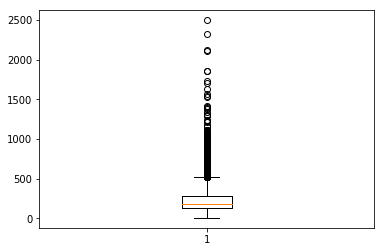

In [29]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [31]:
import os

imdb_dir = "aclImdb"
train_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np

maxlen = 500 
training_samples = 1000 # Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples] 





Found 72633 unique tokens.
Shape of data tensor: (17243, 500)
Shape of label tensor: (17243,)


In [33]:
glove_dir = "C:/Users/SHREYA GANESH/Desktop/NEURAL 3/glove.6B.zip"

embeddings_index = {}

f = open(("glove.6B.100d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


In [34]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector 

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1600032   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [38]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", 
              metrics = ["acc"]) 


In [39]:
import pandas as pd
import numpy as np
import json
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [40]:
df=pd.read_json("Team12_Chevron.json")
df.head(5)

,text,sentiment
1,Good morning. My name is Jonathan and I will b...,neutral
10,"Thanks Mike. Turning to Slide 5, an overview o...",neutral
100,"And so, there are times when we can fall in lo...",negative
101,Our next question comes from the line of Sam M...,neutral
102,"Mike, I'm going to try to not ask you to say t...",neutral


In [44]:
df['sentiment'].value_counts()

neutral     54
positive    45
negative    29
Name: sentiment, dtype: int64

In [45]:
newdf= df[df.sentiment != 'neutral']
newdf['sentiment'].value_counts()

positive    45
negative    29
Name: sentiment, dtype: int64

In [49]:
test_size = int(len(newdf) * 1)
print ("Test size: %d" % test_size)

Test size: 74


In [50]:
test_posts = newdf['text'][:test_size]
test_tags = newdf['sentiment'][:test_size]

In [51]:
max_words = 500
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [52]:
tokenize.fit_on_texts(test_posts) # only fit on train
x_test = tokenize.texts_to_matrix(test_posts)

In [53]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(test_tags)
y_test = encoder.transform(test_tags)


In [54]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_test shape:', x_test.shape)

print('y_test shape:', y_test.shape)

x_test shape: (74, 500)
y_test shape: (74,)


In [56]:
history = model.fit(x_train, y_train,
                   epochs = 5,
                   batch_size = 10,
                   validation_data = (x_test, y_test))
model.save_weights("pre_trained_glove_model.h5")

Train on 1000 samples, validate on 74 samples
Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2227 - acc: 0.9530 - val_loss: 0.7196 - val_acc: 0.4189
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1960 - acc: 0.9740 - val_loss: 0.8118 - val_acc: 0.4459
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1750 - acc: 0.9860 - val_loss: 0.7221 - val_acc: 0.5270
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1636 - acc: 0.9860 - val_loss: 0.8561 - val_acc: 0.4324
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1468 - acc: 0.9910 - val_loss: 0.9562 - val_acc: 0.3784


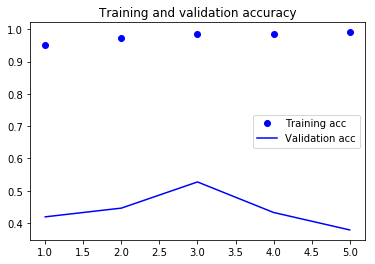

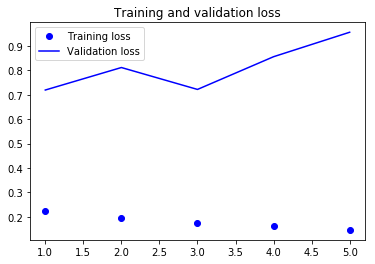

In [57]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [58]:
y_pred=model.predict(x_test)
y_pred

array([[0.5722678 ],
       [0.5512475 ],
       [0.25791815],
       [0.2933035 ],
       [0.5184242 ],
       [0.5696597 ],
       [0.20264065],
       [0.39412966],
       [0.5969138 ],
       [0.59706986],
       [0.1161724 ],
       [0.10210454],
       [0.11410812],
       [0.45639548],
       [0.19336516],
       [0.46345764],
       [0.24796227],
       [0.28735524],
       [0.11213523],
       [0.41150203],
       [0.06528291],
       [0.42820352],
       [0.38247928],
       [0.4535182 ],
       [0.50211185],
       [0.04847804],
       [0.10068759],
       [0.6058401 ],
       [0.42715842],
       [0.38376266],
       [0.18608594],
       [0.48430723],
       [0.2650761 ],
       [0.09728107],
       [0.06317455],
       [0.11447564],
       [0.56472075],
       [0.16688594],
       [0.46603286],
       [0.4254287 ],
       [0.43244243],
       [0.3202325 ],
       [0.47756392],
       [0.45990047],
       [0.56090933],
       [0.44682088],
       [0.0989511 ],
       [0.591

In [59]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

And so, there are times when we can fall in love w ...
Actual label:negative
Predicted label: negative

So I think the increase performance of the Permian ...
Actual label:positive
Predicted label: negative

And we have increased the dividend that Pat has al ...
Actual label:positive
Predicted label: negative

Okay. And just on a related note; I guess this one ...
Actual label:negative
Predicted label: negative

Sam, we don’t have a target leverage rate, we thin ...
Actual label:negative
Predicted label: negative

So, I think that’s really what we are trying to -- ...
Actual label:positive
Predicted label: negative

For the full year earnings excluding special items ...
Actual label:positive
Predicted label: negative

We’re still very positive on the petrochemical inv ...
Actual label:negative
Predicted label: negative

And Mike, we always appreciate you getting on thes ...
Actual label:negative
Predicted label: negative

So it's not something that I can project with any  ...
Actual la

In [60]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

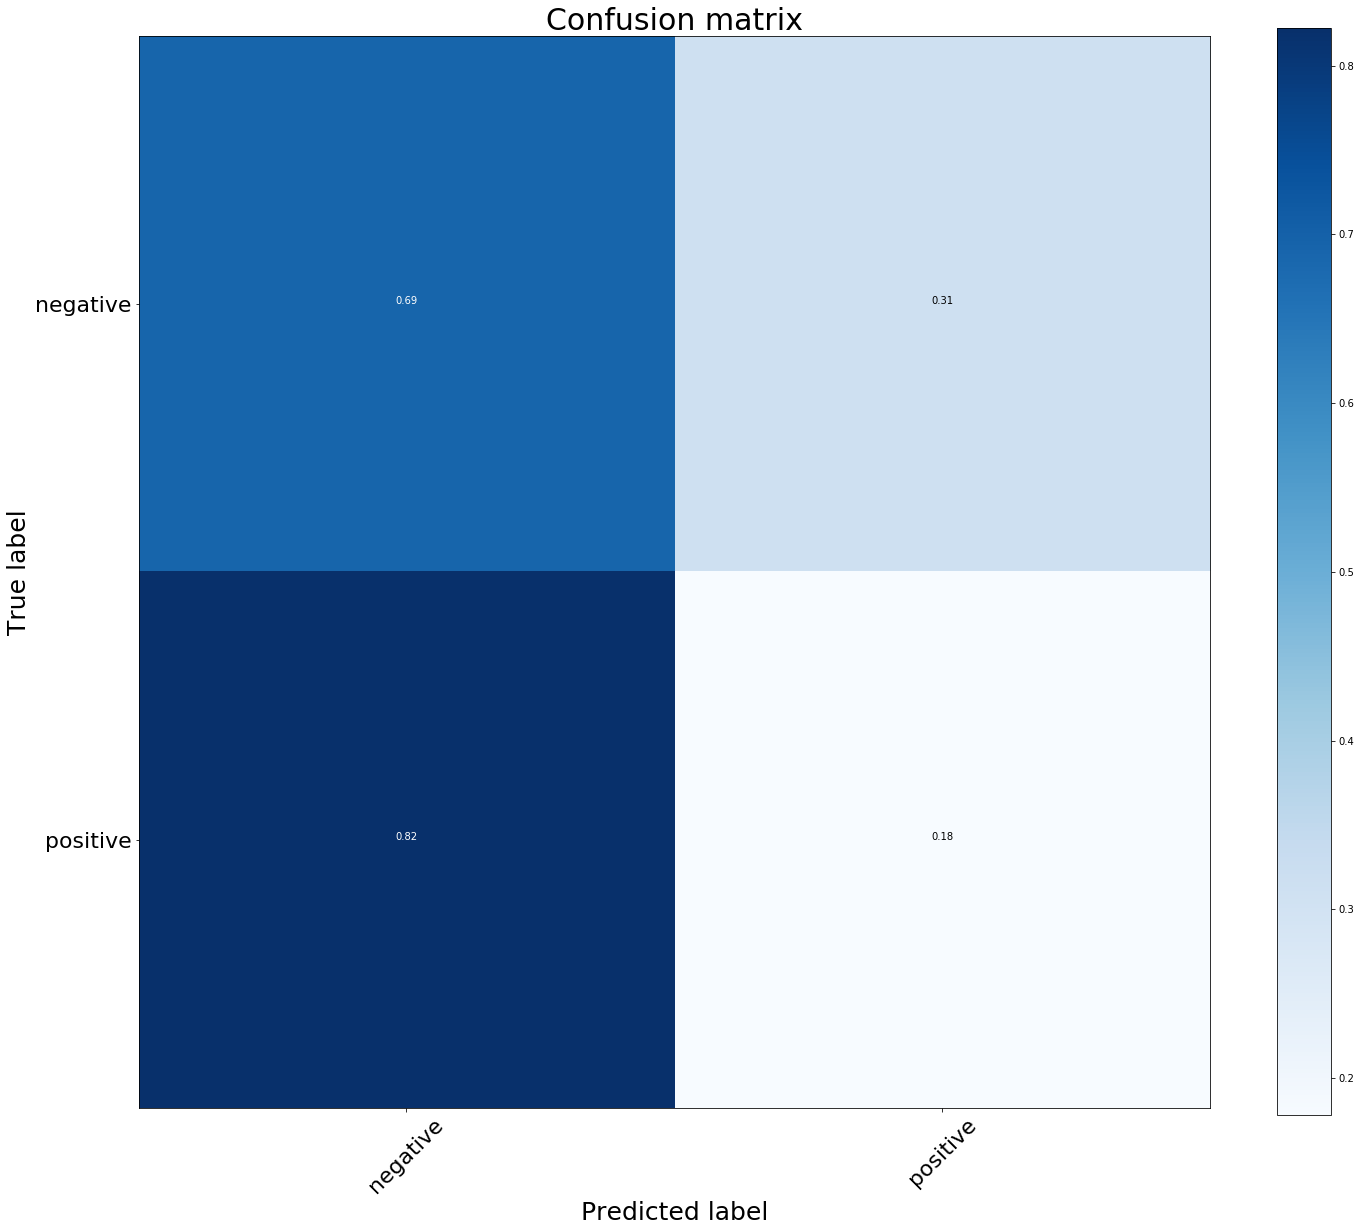

In [61]:
cnf_matrix = confusion_matrix(y_test,y_pred.round())
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()